# CHAPTER 8 Object references, mutability and recycling
## Variables are not boxes
Python variables are like reference variables in Java, so it’s better to think
of them as labels attached to objects.

In [2]:
class Gizmo:
    def __init__(self):
        print('Gizmo id: %d' % id(self))

In [5]:
x=Gizmo()

Gizmo id: 91791880


In [6]:
y=Gizmo()*10

Gizmo id: 91792104


TypeError: unsupported operand type(s) for *: 'Gizmo' and 'int'

In [7]:
dir()

['Gizmo',
 'In',
 'Out',
 '_',
 '_3',
 '_4',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'quit',
 'x']

To understand an assignment in Python, always read the right-hand
side first: that’s where the object is created or retrieved. After that, the
variable on the left is bound to the object, like a label stuck to it. Just
forget about the boxes.
## Identity, equality and aliases

In [8]:
charles = {'name': 'Charles L. Dodgson', 'born': 1832}
lewis = charles
lewis is charles

True

In [9]:
id(charles)

91771024

In [10]:
id(lewis)

91771024

In [11]:
lewis['balance']=500
charles

{'balance': 500, 'born': 1832, 'name': 'Charles L. Dodgson'}

In [12]:
alex = {'name': 'Charles L. Dodgson', 'born': 1832, 'balance': 500}
alex==lewis

True

In [13]:
alex is lewis

False

Every object has an identity, a type and a value. An object’s identity never changes once
it has been created; you may think of it as the object’s address in memory. The is operator
compares the identity of two objects; the id() function returns an integer representing
its identity.
### Choosing between == and is
The == operator compares the values of objects (the data they hold), while is compares
their identities.However, if you are comparing a variable to a singleton, then it makes sense to use is.
By far, the most common case is checking whether a variable is bound to None. This is
the recommended way to do it:
x is None
And the proper way to write its negation is:
x is not None

### The relative immutability of tuples
Tuples, like most Python collections — lists, dicts, sets etc. — hold references to objects2.
If the referenced items are mutable, they may change even if the tuple itself does
not. In other words, the immutability of tuples really refers to the physical contents of
the tuple data structure (ie. the references it holds), and does not extend to the referenced
objects

On the other hand, single-type sequences like str, bytes and array.array are flat: they don’t contain
references but physically hold their data — characters, bytes and numbers — in contiguous memory.

In [15]:
t1 = (1, 2, [30, 40])
t2 = (1, 2, [30, 40])
t1 == t2

True

In [16]:
id(t1[-1])

91786952

In [17]:
t1[-1].append(99)

In [18]:
id(t1[-1]),t1

(91786952, (1, 2, [30, 40, 99]))

In [19]:
t1==t2

False

## Copies are shallow by default
The easiest way to copy a list (or most built-in mutable collections) is to use the builtin
constructor for the type itself

In [20]:
l1 = [3, [55, 44], (7, 8, 9)]
l2 = list(l1)
l2

[3, [55, 44], (7, 8, 9)]

In [21]:
l2==l1, l2 is l1

(True, False)

For lists and other mutable sequences, the shortcut l2 = l1[:] also makes a copy
However, using the constructor or [:] produces a shallow copy, i.e. the outermost container
is duplicated, but the copy is filled with references to the same items held by the
original container. This saves memory and causes no problems if all the items are immutable.
But if there are mutable items, this may lead to unpleasant surprises.
It should be clear now that shallow copies are easy to make, but they may or may not
be what you want.

In [22]:
l3=l1[:]
l3

[3, [55, 44], (7, 8, 9)]

In [24]:
l1 = [3, [66, 55, 44], (7, 8, 9)]
l2 = list(l1) #
print(l1,l2)
l1.append(100) #
l1[1].remove(55) #
print('l1:', l1)
print('l2:', l2)
l2[1] += [33, 22] #
l2[2] += (10, 11) #
print('l1:', l1)
print('l2:', l2)

[3, [66, 55, 44], (7, 8, 9)] [3, [66, 55, 44], (7, 8, 9)]
l1: [3, [66, 44], (7, 8, 9), 100]
l2: [3, [66, 44], (7, 8, 9)]
l1: [3, [66, 44, 33, 22], (7, 8, 9), 100]
l2: [3, [66, 44, 33, 22], (7, 8, 9, 10, 11)]


### Deep and shallow copies of arbitrary objects
Working with shallow copies is not always a problem, but sometimes you need to make
deep copies, i.e. duplicates that do not share references of embedded objects.
The copy module provides the deepcopy and copy functions that return deep and shallow copies
of arbitrary objects.

In [25]:
class Bus:
    def __init__(self, passengers=None):
        if passengers is None:
            self.passengers = []
        else:
            self.passengers = list(passengers)
    def pick(self, name):
        self.passengers.append(name)
    def drop(self, name):
        self.passengers.remove(name)

In [40]:
import copy
bus1 = Bus(['Alice', 'Bill', 'Claire', 'David'])
bus2 = copy.copy(bus1)
bus3 = copy.deepcopy(bus1)
id(bus1), id(bus2), id(bus3)
bus1.drop('Bill')
bus1.passengers,bus2.passengers,bus3.passengers

(['Alice', 'Claire', 'David'],
 ['Alice', 'Claire', 'David'],
 ['Alice', 'Bill', 'Claire', 'David'])

In [41]:
id(bus1.passengers), id(bus2.passengers), id(bus3.passengers)

(92399624, 92399624, 92400840)

## Function parameters as references
The only mode of parameter passing in Python is call by sharing. That is the same mode
used in most OO languages, including Ruby, SmallTalk and Java3. Call by sharing means
that each formal parameter of the function gets a copy of each reference in the arguments.
In other words, the parameters inside the function become aliases of the actual
arguments.
The result of this scheme is that a function may change any mutable object passed as a
parameter, but it cannot change the identity of those objects, i.e. it cannot replace altogether
an object with another.

In [42]:
def f(a, b):
    a += b
    return a

In [46]:
x = 1
y = 2
f(x,y),x,y

(3, 1, 2)

In [45]:
a = [1, 2]
b = [3, 4]
f(a, b),a,b

([1, 2, 3, 4], [1, 2, 3, 4], [3, 4])

In [47]:
t = (10, 20)
u = (30, 40)
f(t, u),t,u

((10, 20, 30, 40), (10, 20), (30, 40))

### Mutable types as parameter defaults: bad idea

In [60]:
class HauntedBus:
    """A bus model haunted by ghost passengers"""
    def __init__(self, passengers=[]):
        self.passengers = passengers
    def pick(self, name):
        self.passengers.append(name)
    def drop(self, name):
        self.passengers.remove(name)

In [61]:
bus1 = HauntedBus(['Alice', 'Bill'])
bus1.passengers

['Alice', 'Bill']

In [62]:
bus1.pick('Charlie')
bus1.drop('Alice')
bus1.passengers

['Bill', 'Charlie']

In [63]:
bus2 = HauntedBus()
bus2.pick('Carrie')
bus2.passengers

['Carrie']

In [64]:
bus3 = HauntedBus()
bus3.passengers

['Carrie']

In [65]:
bus3.pick('Dave')

In [66]:
bus2.passengers

['Carrie', 'Dave']

In [67]:
bus2.passengers is bus3.passengers

True

In [68]:
bus1.passengers

['Bill', 'Charlie']

Strange things happen only when a
HauntedBus starts empty, because then self.passengers becomes an alias for the default
value of the passengers parameter.
if a default value is a mutable
object, and you change it, the change will affect every future call of the function.

In [69]:
dir(HauntedBus.__init__)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [70]:
HauntedBus.__init__.__defaults__

(['Carrie', 'Dave'],)

In [71]:
HauntedBus.__init__.__defaults__[0] is bus2.passengers

True

The issue with mutable defaults explains why None is often used as the default value for
parameters that may receive mutable values.
### Defensive programming with mutable parameters
When you are coding a function that receives a mutable parameter you should carefully
consider whether the caller expects the argument passed to be changed.

In [72]:
class TwilightBus:
    """A bus model that makes passengers vanish"""
    def __init__(self, passengers=None):
        if passengers is None:
            self.passengers = []
        else:
            self.passengers = passengers
    def pick(self, name):
        self.passengers.append(name)
    def drop(self, name):
        self.passengers.remove(name)

In [73]:
basketball_team = ['Sue', 'Tina', 'Maya', 'Diana', 'Pat']
bus = TwilightBus(basketball_team)
bus.drop('Tina')
bus.drop('Pat')
basketball_team

['Sue', 'Maya', 'Diana']

In [74]:
class TwilightBus:
    """A bus model that makes passengers vanish"""
    def __init__(self, passengers=None):
        if passengers is None:
            self.passengers = []
        else:
            self.passengers = list(passengers)
    def pick(self, name):
        self.passengers.append(name)
    def drop(self, name):
        self.passengers.remove(name)

In [76]:
basketball_team = ['Sue', 'Tina', 'Maya', 'Diana', 'Pat']
bus = TwilightBus(basketball_team)
bus.drop('Tina')
bus.drop('Pat')
bus.passengers,basketball_team

(['Sue', 'Maya', 'Diana'], ['Sue', 'Tina', 'Maya', 'Diana', 'Pat'])

Unless a method is explicitly intended to mutate an object received
as argument, you should think twice before aliasing the argument
object by simply assigning it to an instance variable in your class. If
in doubt, make a copy. Your clients will often be happier.
## del and garbage collection
The del statement deletes names, not objects. An object may be garbage collected as
result of a del command, but only if the variable deleted holds the last reference to the
object, or if the object becomes unreachable4. Rebinding a variable may also cause the
number of references to an object reach zero, causing its destruction.
There is a __del__ special method, but it does not cause the disposal
of the instance, and should not be called by your code. __del__ is
invoked by the Python interpreter when the instance is about to be
destroyed to give it a chance to release external resources. You will
seldom need to implement __del__ in your own code, yet some
Python beginners spend time coding it for no good reason. The
proper use of __del__ is rather tricky.

In [77]:
import weakref
s1 = {1, 2, 3}
s2 = s1
def bye():
    print('Gone with the wind...')
ender = weakref.finalize(s1, bye)
ender.alive

True

In [78]:
del s1
ender.alive

True

In [79]:
s2 = 'spam'

Gone with the wind...


In [80]:
ender.alive

False

#### class weakref.finalize(obj, func, *args, **kwargs)
Return a callable finalizer object which will be called when obj is garbage collected. Unlike an ordinary weak reference, a finalizer will always survive until the reference object is collected, greatly simplifying lifecycle management.

A finalizer is considered alive until it is called (either explicitly or at garbage collection), and after that it is dead. Calling a live finalizer returns the result of evaluating func(*arg, **kwargs), whereas calling a dead finalizer returns None.
## Weak references

sometimes it is useful to have a reference to an object that does not keep it around longer than necessary.
A common use case is a cache.

Weak references to an object do not increase its reference count. The object that is the
target of a reference is called the referent. Therefore, we say that a weak reference does
not prevent the referent from being garbage collected.

Weak references are useful in caching applications because you don’t want the cached
objects to be kept alive just because they are referenced by the cache.

a weakref.ref instance can be called to reach its referent. If
the object is alive, calling the weak reference returns it, otherwise None is returned.

In [81]:
import weakref
a_set = {0, 1}
wref = weakref.ref(a_set)
wref

<weakref at 0x000000000583D098; to 'set' at 0x00000000057822E8>

In [82]:
wref()

{0, 1}

In [83]:
a_set = {2, 3, 4}

In [84]:
wref()

{0, 1}

In [85]:
wref() is None

False

In [87]:
wref() is None

False

### The WeakValueDictionary skit
The class WeakValueDictionary implements a mutable mapping where the values are
weak references to objects. When a referred object is garbage collected elsewhere in the
program, the corresponding key is automatically removed from the WeakValueDiction
ary. This is commonly used for caching.

In [89]:
class Cheese:
    def __init__(self, kind):
        self.kind = kind
    def __repr__(self):
        return 'Cheese(%r)' % self.kind

In [91]:
import weakref
stock = weakref.WeakValueDictionary()
catalog = [Cheese('Red Leicester'), Cheese('Tilsit'),
    Cheese('Brie'), Cheese('Parmesan')]
for cheese in catalog:
    stock[cheese.kind] = cheese
sorted(stock.keys())

['Brie', 'Parmesan', 'Red Leicester', 'Tilsit']

In [92]:
del catalog
sorted(stock.keys())

['Parmesan']

In [93]:
del cheese

In [94]:
sorted(stock.keys())

[]

[A WeakKeyDictionary] can be used to associate additional data with an object owned
by other parts of an application without adding attributes to those objects. This can be
especially useful with objects that override attribute accesses.
The weakref module also provides a WeakSet, simply described in the docs as “Set class
that keeps weak references to its elements. An element will be discarded when no strong
reference to it exists any more.” If you need to build a class that is aware of every one of
its instances, a good solution is to create a class attribute with a WeakSet to hold the
references to the instances. Otherwise, if a regular set was used, the instances would
never be garbage collected, because the class itself would have strong references to them,
and classes live as long as the Python process unless you deliberately delete them.
### Limitations of weak references
Not every Python object may be the target, or referent, of a weak reference. Basic list
and dict instances may not be referents, but a plain subclass of either can solve this
problem easily:

In [97]:
class MyList(list):
    """list subclass whose instances may be weakly referenced"""
a_list = MyList(range(10))
wref_to_a_list = weakref.ref(a_list)

## Tricks Python plays with immutables

In [98]:
t1 = (1, 2, 3)
t2 = tuple(t1)
t2 is t1

True

In [99]:
t3 = t1[:]
t3 is t1

True

In [100]:
t1 = (1, 2, 3)
t3 = (1, 2, 3) #
t3 is t1

False

In [101]:
s1 = 'ABC'
s2 = 'ABC' #
s2 is s1

True

The sharing of string literals is an optimization technique called interning. CPython
uses the same technique with small integers to avoid unnecessary duplication of “popular”
numbers like 0, -1 and 42. Please note that CPython does not intern all strings or
integers, and the criteria it uses to do so is an undocumented implementation detail.

Never depend on str or int interning! Always use == and not
is to compare them for equality. Interning is a feature for
internal use of the Python interpreter.

# CHAPTER 9 A Pythonic object
## Object representations
Every object-oriented language has at least one standard way of getting a string representation
from any object. Python has two:
repr()
Return a string representing the object as the developer wants to see it.
str()
Return a string representing the object as the user wants to see it.
As you know, we implement the special methods __repr__ and __str__ to support
repr() and str().
There are two additional special methods to support alternate representations of objects:
__bytes__ and __format__. The __bytes__ method is analogous to __str__: it’s called
by bytes() to get the object represented as a byte sequence. Regarding __format__,
both the built-in function format() and the str.format() method call it to get string
displays of objects using special formatting codes.
## Vector class redux


In [126]:
from array import array
import math
class Vector2d:
    typecode = 'd'
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)
    def __iter__(self):
        return (i for i in (self.x, self.y))
    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)
    def __str__(self):
        return str(tuple(self))
    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +
            bytes(array(self.typecode, self)))
    def __eq__(self, other):
        return tuple(self) == tuple(other)
    def __abs__(self):
        return math.hypot(self.x, self.y)  ## 返回欧几里德范数
    def __bool__(self):
        return bool(abs(self))
    @classmethod
    def frombytes(cls, octets): 
        typecode = chr(octets[0])
        memv = memoryview(octets[1:]).cast(typecode)
        return cls(*memv)
    def angle(self):
        return math.atan2(self.y, self.x) # 返回给定的 X 及 Y 坐标值的反正切值。
    def __format__(self, fmt_spec=''):
        if fmt_spec.endswith('p'):
            fmt_spec = fmt_spec[:-1]
            coords = (abs(self), self.angle())
            outer_fmt = '<{}, {}>'
        else:
            coords = self
            outer_fmt = '({}, {})'
        components = (format(c, fmt_spec) for c in coords)
        return outer_fmt.format(*components)

In [128]:
format(Vector2d(1, 1), 'p')

'<1.4142135623730951, 0.7853981633974483>'

In [129]:
format(Vector2d(1, 1), '.3ep')

'<1.414e+00, 7.854e-01>'

In [130]:
format(Vector2d(1, 1), '0.5fp')

'<1.41421, 0.78540>'

In [103]:
v1 = Vector2d(3, 4)
print(v1.x, v1.y)

3.0 4.0


In [104]:
x, y = v1
x, y

(3.0, 4.0)

In [105]:
v1

Vector2d(3.0, 4.0)

In [106]:
v1_clone = eval(repr(v1))
v1 == v1_clone

True

In [107]:
print(v1)

(3.0, 4.0)


In [109]:
octets = bytes(v1)
octets

b'd\x00\x00\x00\x00\x00\x00\x08@\x00\x00\x00\x00\x00\x00\x10@'

In [110]:
abs(v1)

5.0

In [111]:
bool(v1), bool(Vector2d(0, 0))

(True, False)

## An alternative constructor

## classmethod versus staticmethod
Let’s start with classmethod. Example 9-3 shows its use: to define a method that operates
on the class and not on instances. classmethod changes the way the method is called,
so it receives the class itself as the first argument, instead of an instance.

In contrast, the staticmethod decorator changes a method so that it receives no special
first argument. In essence, a static method is just like a plain function that happens to
live in a class body, instead of being defined at the module level.

In [112]:
class Demo:
    @classmethod
    def klassmeth(*args):
        return args #
    @staticmethod
    def statmeth(*args):
        return args

In [113]:
Demo.klassmeth()

(__main__.Demo,)

In [114]:
Demo.klassmeth('spam')

(__main__.Demo, 'spam')

In [115]:
Demo.statmeth()

()

In [116]:
Demo.statmeth('spam')

('spam',)

## Formatted displays
The format() built-in function and the str.format() method delegate the actual formatting
to each type by calling their .__format__(format_spec) method. The for
mat_spec is a formatting specifier, which is either:
• The second argument in format(my_obj, format_spec), or
• whatever appears after the colon in a replacement field delimited with {} inside a
format string used with str.format().

In [117]:
format(42, 'b')

'101010'

In [118]:
format(2/3, '.1%')

'66.7%'

In [119]:
from datetime import datetime
now = datetime.now()
format(now, '%H:%M:%S')

'08:30:57'

In [120]:
"It's now {:%I:%M %p}".format(now)

"It's now 08:30 AM"

## A hashable Vector2d

In [132]:
class Vector2d:
    typecode = 'd'
    def __init__(self, x, y):
        self.__x = float(x)
        self.__y = float(y)
    @property #The @property decorator marks the getter method of a property.

    def x(self):
        return self.__x
    @property
    def y(self):
        return self.__y
    def __iter__(self):
        return (i for i in (self.x, self.y))
    def __hash__(self):
        return hash(self.x) ^ hash(self.y)


In [133]:
v1 = Vector2d(3, 4)
v2 = Vector2d(3.1, 4.2)
hash(v1), hash(v2)

(-9223372036848840602, -9223372036848840609)

In [134]:
set([v1, v2])

{<__main__.Vector2d at 0x5a90668>, <__main__.Vector2d at 0x5a905f8>}

In [135]:
from array import array   #v3
import math

class Vector2d:
    typecode = 'd'

    def __init__(self, x, y):
        self.__x = float(x)
        self.__y = float(y)

    @property
    def x(self):
        return self.__x

    @property
    def y(self):
        return self.__y

    def __iter__(self):
        return (i for i in (self.x, self.y))

    def __repr__(self):
        class_name = type(self).__name__
        return '{}({!r}, {!r})'.format(class_name, *self)

    def __str__(self):
        return str(tuple(self))

    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +
                bytes(array(self.typecode, self)))

    def __eq__(self, other):
        return tuple(self) == tuple(other)

    def __hash__(self):
        return hash(self.x) ^ hash(self.y)

    def __abs__(self):
        return math.hypot(self.x, self.y)

    def __bool__(self):
        return bool(abs(self))

    def angle(self):
        return math.atan2(self.y, self.x)

    def __format__(self, fmt_spec=''):
        if fmt_spec.endswith('p'):
            fmt_spec = fmt_spec[:-1]
            coords = (abs(self), self.angle())
            outer_fmt = '<{}, {}>'
        else:
            coords = self
            outer_fmt = '({}, {})'
        components = (format(c, fmt_spec) for c in coords)
        return outer_fmt.format(*components)

    @classmethod
    def frombytes(cls, octets):
        typecode = chr(octets[0])
        memv = memoryview(octets[1:]).cast(typecode)
        return cls(*memv)

## Private and “protected” attributes in Python
In Python there is no way to create private variables in the strong sense of the pri
vate modifier in Java. What we have in Python is a simple mechanism to prevent accidental
overwriting of a “private” attribute in a subclass.
To prevent this, if you name an instance attribute in the form __mood (two leading
underscores and zero or at most one trailing underscore), Python stores the name in
the instance __dict__ prefixed with a leading underscore and the class name, so in the
Dog class, __mood becomes _Dog__mood, and in Beagle it’s _Beagle__mood. This language
feature goes by the lovely name of name mangling.

In [138]:
v1=Vector2d(3,4)
v1.__dict__

{'_Vector2d__x': 3.0, '_Vector2d__y': 4.0}

In [139]:
v1._Vector2d__x

3.0

Name mangling is about safety, not security: it’s designed to prevent accidental access
and not intentional wrongdoing

Attributes with a single _ prefix are called “protected” in some corners of the Python
documentation9. The practice of “protecting” attributes by convention with the form
self._x is widespread, but calling that a “protected” attribute is not so common. Some
even call that a “private” attribute.
## Saving space with the __slots__ class attribute
By default, Python stores instance attributes in a per-instance dict named __dict__.
As we saw in “Practical consequences of how dict works” on page 90, dictionaries have
a significant memory overhead because of the underlying hash table used to provide
fast access. If you are dealing with millions of instances with few attributes, the
__slots__ class attribute can save a lot of memory, by letting the interpreter store the
instance attributes in a tuple instead of a dict.

By defining __slots__ in the class, you are telling the interpreter: “These are all the
instance attributes in this class.” Python then stores them in a tuple-like structure in
each instance, avoiding the memory overhead of the per-instance __dict__. This can
make a huge difference in memory usage if your have millions of instances active at the
same time.

## Overriding class attributes


In [141]:
v1 = Vector2d(1.1, 2.2)
dumpd = bytes(v1)
dumpd

b'd\x9a\x99\x99\x99\x99\x99\xf1?\x9a\x99\x99\x99\x99\x99\x01@'

In [142]:
len(dumpd)

17

In [143]:
v1.typecode='f'
dumpf = bytes(v1)
dumpf

b'f\xcd\xcc\x8c?\xcd\xcc\x0c@'

In [144]:
len(dumpf)

9

In [145]:
Vector2d.typecode

'd'

If you want to change a class attribute you must set it on the class directly, not through
an instance.

However, there is an idiomatic Python way of achieving a more permanent effect, and
being more explicit about the change. Since class attributes are public, they are inherited
by subclasses, so it’s common practice to subclass just to customize a class data attribute.

In [146]:
class ShortVector2d(Vector2d): #
    typecode = 'f'

In [147]:
sv = ShortVector2d(1/11, 1/27)
sv

ShortVector2d(0.09090909090909091, 0.037037037037037035)

In [148]:
len(bytes(sv))

9

# CHAPTER 10 Sequence hacking, hashing and slicing
## Vector: a user-defined sequence type

In [167]:
#v1
from array import array 
import reprlib
import math
class Vector:
    typecode = 'd'
    def __init__(self, components):
        self._components = array(self.typecode, components)
    def __iter__(self):
        return iter(self._components)
    def __repr__(self):
        components = reprlib.repr(self._components)
        components = components[components.find('['):-1]
        return 'Vector({})'.format(components)
    def __str__(self):
        return str(tuple(self))
    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +
            bytes(self._components))
    def __eq__(self, other):
        return tuple(self) == tuple(other)
    def __abs__(self):
        return math.sqrt(sum(x * x for x in self))
    def __bool__(self):
        return bool(abs(self))
    @classmethod
    def frombytes(cls, octets):
        typecode = chr(octets[0])
        memv = memoryview(octets[1:]).cast(typecode)
        return cls(memv)
    def __len__(self):
        return len(self._components)
    def __getitem__(self, index):
        return self._components[index]

## Protocols and duck typing
In the context of Object Oriented Programming, a protocol is an informal interface,
defined only in documentation and not in code.
## Vector take #2: a sliceable sequence

In [151]:
v1 = Vector([3, 4, 5])
len(v1)

3

In [152]:
v1[0], v1[-1]

(3.0, 5.0)

In [155]:
v7 = Vector(range(7))
v7[1:4]

array('d', [1.0, 2.0, 3.0])

### How slicing works

In [156]:
class MySeq:
    def __getitem__(self, index):
        return index

In [157]:
s = MySeq()
s[1]

1

In [158]:
s[1:4]

slice(1, 4, None)

In [159]:
s[1:4:2]

slice(1, 4, 2)

In [160]:
s[1:4:2, 9]

(slice(1, 4, 2), 9)

In [161]:
s[1:4:2, 7:9]

(slice(1, 4, 2), slice(7, 9, None))

In [162]:
slice

slice

In [163]:
dir(slice)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'indices',
 'start',
 'step',
 'stop']

In [164]:
help(slice.indices)

Help on method_descriptor:

indices(...)
    S.indices(len) -> (start, stop, stride)
    
    Assuming a sequence of length len, calculate the start and stop
    indices, and the stride length of the extended slice described by
    S. Out of bounds indices are clipped in a manner consistent with the
    handling of normal slices.



In [165]:
slice(None, 10, 2).indices(5)

(0, 5, 2)

In [166]:
slice(-3, None, None).indices(5)

(2, 5, 1)

### A slice-aware __getitem__

In [206]:
#v2
from array import array 
import reprlib
import math
import numbers
import functools #
import operator
import itertools
class Vector:
    typecode = 'd'
    def __init__(self, components):
        self._components = array(self.typecode, components)
    def __iter__(self):
        return iter(self._components)
    def __repr__(self):
        components = reprlib.repr(self._components)
        components = components[components.find('['):-1]
        return 'Vector({})'.format(components)
    def __str__(self):
        return str(tuple(self))
    def __bytes__(self):
        return (bytes([ord(self.typecode)]) +
            bytes(self._components))
    def __abs__(self):
        return math.sqrt(sum(x * x for x in self))
    def __bool__(self):
        return bool(abs(self))
    @classmethod
    def frombytes(cls, octets):
        typecode = chr(octets[0])
        memv = memoryview(octets[1:]).cast(typecode)
        return cls(memv)
    def __len__(self):
        return len(self._components)
    def __getitem__(self, index):
        cls = type(self)
        if isinstance(index, slice):
            return cls(self._components[index])
        elif isinstance(index, numbers.Integral):
            return self._components[index]
        else:
            msg = '{cls.__name__} indices must be integers'
            raise TypeError(msg.format(cls=cls))
    #v3 add
    shortcut_names = 'xyzt'
    def __getattr__(self, name):
        cls = type(self)
        if len(name) == 1:
            pos = cls.shortcut_names.find(name)
            if 0 <= pos < len(self._components):
                return self._components[pos]
        msg = '{.__name__!r} object has no attribute {!r}'
        raise AttributeError(msg.format(cls, name))
    #v3 add2
    def __setattr__(self, name, value):
        cls = type(self)
        if len(name) == 1:
            if name in cls.shortcut_names:
                error = 'readonly attribute {attr_name!r}'
            elif name.islower():
                error = "can't set attributes 'a' to 'z' in {cls_name!r}"
            else:
                error = ''
            if error:
                msg = error.format(cls_name=cls.__name__, attr_name=name)
                raise AttributeError(msg)
        super().__setattr__(name, value)#The super() function provides a way to access methods of superclasses
                                        #dynamically, a necessity in a dynamic language supporting
                                        #multiple inheritance like Python.
                
    #v4 add 
    def __eq__(self, other):
        return len(self) == len(other) and all(a == b for a, b in zip(self, other))
    def __hash__(self):
        hashes = (hash(x) for x in self._components) #
        return functools.reduce(operator.xor, hashes, 0)
    #v5 add 
    def angle(self, n):
        r = math.sqrt(sum(x * x for x in self[n:]))
        a = math.atan2(r, self[n-1])
        if (n == len(self) - 1) and (self[-1] < 0):
            return math.pi * 2 - a
        else:
            return a
    def angles(self):
        return (self.angle(n) for n in range(1, len(self)))
    def __format__(self, fmt_spec=''):
        if fmt_spec.endswith('h'): # hyperspherical coordinates
            fmt_spec = fmt_spec[:-1]
            coords = itertools.chain([abs(self)],self.angles())
            outer_fmt = '<{}>'
        else:
            coords = self
            outer_fmt = '({})'
        components = (format(c, fmt_spec) for c in coords)
        return outer_fmt.format(', '.join(components))

In [171]:
v7 = Vector(range(7))
v7[-1]

6.0

In [172]:
v7[1:4]

Vector([1.0, 2.0, 3.0])

In [173]:
v7[-1:]

Vector([6.0])

In [174]:
v7[1,2]

TypeError: Vector indices must be integers

## Vector take #3: dynamic attribute access

In [178]:
v = Vector(range(10))
v.x,v.y, v.z, v.t

(0.0, 1.0, 2.0, 3.0)

In [182]:
v = Vector(range(5))
v

Vector([0.0, 1.0, 2.0, 3.0, 4.0])

In [183]:
v.x

0.0

In [185]:
v.x=10
v.x,v

(10, Vector([0.0, 1.0, 2.0, 3.0, 4.0]))

The inconsistency in Example 10-9 was introduced because of the way __getattr__
works: Python only calls that method as a fall back, when the object does not have the
named attribute.

On the other hand, our implementation of __getattr__ pays no attention to instance attributes other than self._components, from
where it retrieves the values of the “virtual attributes” listed in shortcut_names.

In [192]:
v = Vector(range(5))

In [194]:
v.x=10

AttributeError: readonly attribute 'x'

## Vector take #4: hashing and a faster ==
So far we’ve seen that functools.reduce() can be replaced by sum(), but now let’s
properly explain how it works. The key idea is to reduce a series of values to a single
value. The first argument to reduce() is a two-argument function, and the second
argument is an iterable. Let’s say we have a two-argument function fn and a list lst.
When you call reduce(fn, lst), fn will be applied to the first pair of elements —
fn(lst[0], lst[1]) — producing a first result, r1. Then fn is applied to r1 and the
next element — fn(r1, lst[2]) — producing a second result r2. Now fn(r2,
lst[3]) is called to produce r3 … and so on until the last element, when a single result
rN is returned.

In [195]:
import functools
functools.reduce(lambda a,b: a*b, range(1, 6))

120

In [196]:
n = 0
for i in range(1, 6): #
    n ^= i

In [197]:
n

1

In [198]:
import functools
functools.reduce(lambda a, b: a^b, range(6))

1

In [199]:
import operator
functools.reduce(operator.xor, range(6))

1

## Vector take #5: formatting

In [207]:
format(Vector([-1, -1, -1, -1]), 'h')

'<2.0, 2.0943951023931957, 2.186276035465284, 3.9269908169872414>'

In [208]:
format(Vector([2, 2, 2, 2]), '.3eh')

'<4.000e+00, 1.047e+00, 9.553e-01, 7.854e-01>'

In [209]:
format(Vector([0, 1, 0, 0]), '0.5fh')

'<1.00000, 1.57080, 0.00000, 0.00000>'

#### itertools.chain(*iterables)¶
Make an iterator that returns elements from the first iterable until it is exhausted, then proceeds to the next iterable, until all of the iterables are exhausted. Used for treating consecutive sequences as a single sequence.

# CHAPTER 11 Interfaces: from protocols to ABCs
An abstract class represents an interface.
## Interfaces and protocols in Python culture
protocols are defined as the informal interfaces that make polymorphism work in languages with dynamic typing
like Python.
How do interfaces work in a dynamic-typed language? First, the basics: even without
an interface keyword in the language, and regardless of ABCs, every class has an
interface: the set public attributes (methods or data attributes) implemented or inherited
by the class. This includes special methods, like __getitem__ or __add__.
By definition, protected and private attributes are not part of an interface, even if “protected”
is merely a naming convention (the single leading underscore) and private attributes
are easily accessed
On the other hand, it’s not a sin to have public data attributes as part of the interface of
an object
A useful complementary definition of interface is: the subset of an object’s public methods
that enable it to play a specific role in the system.
Protocols are interfaces, but because they are informal — defined only by documentation
and conventions — protocols cannot be enforced like formal interfaces can (we’ll
see how ABCs enforce interface conformance later in this chapter). A protocol may be
partially implemented in a particular class, and that’s OK.
## Python digs sequences
In summary, given the importance of the sequence protocol, in the absence __iter__
and __contains__ Python still manages to make iteration and the in operator work by
invoking __getitem__.

In [210]:
class Foo:
    def __getitem__(self, pos):
        return range(0, 30, 10)[pos]
    

In [212]:
f=Foo()
f[1]

10

In [213]:
20 in f

True

In [214]:
15 in f

False

## Monkey-patching to implement a protocol at run time


In [216]:
from random import shuffle
l = list(range(10))
shuffle(l)
l

[9, 1, 7, 6, 0, 5, 2, 8, 3, 4]

In [221]:
import collections
Card = collections.namedtuple('Card', ['rank', 'suit'])
class FrenchDeck:
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                                        for rank in self.ranks]
    def __len__(self):
        return len(self._cards)
    def __getitem__(self, position):
        return self._cards[position]
    
 

FrenchDeck only implements the immutable sequence protocol. Mutable sequences
must also provide a __setitem__ method.

In [224]:
def set_card(deck, position, card):
        deck._cards[position] = card
FrenchDeck.__setitem__ = set_card
deck = FrenchDeck()
shuffle(deck)
deck[:5]

[Card(rank='Q', suit='clubs'),
 Card(rank='8', suit='spades'),
 Card(rank='J', suit='hearts'),
 Card(rank='K', suit='hearts'),
 Card(rank='9', suit='hearts')]

## Waterfowl and ABCs
ABCs are meant to encapsulate very general concepts, abstractions, introduced by a
framework — things like “a sequence” and “an exact number”. [Readers] most likely don’t
need to write any new ABCs, just use existing ones correctly, to get 99.9% of the benefits
without serious risk of mis-design.
## Subclassing an ABC

In [226]:
import collections
Card = collections.namedtuple('Card', ['rank', 'suit'])
class FrenchDeck2(collections.MutableSequence):
    ranks = [str(n) for n in range(2, 11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    def __init__(self):
        self._cards = [Card(rank, suit) for suit in self.suits
                                        for rank in self.ranks]
    def __len__(self):
        return len(self._cards)
    def __getitem__(self, position):
        return self._cards[position]
    def __setitem__(self, position, value): #
        self._cards[position] = value
    def __delitem__(self, position): #
        del self._cards[position]
    def insert(self, position, value): #
        self._cards.insert(position, value)

## ABCs in the standard library
Since Python 2.6 ABCs are available in the standard library. Most are defined in the
collections.abc module, but there are others. You can find ABCs in the numbers and
io packages, for example.
### ABCs in collections.abc
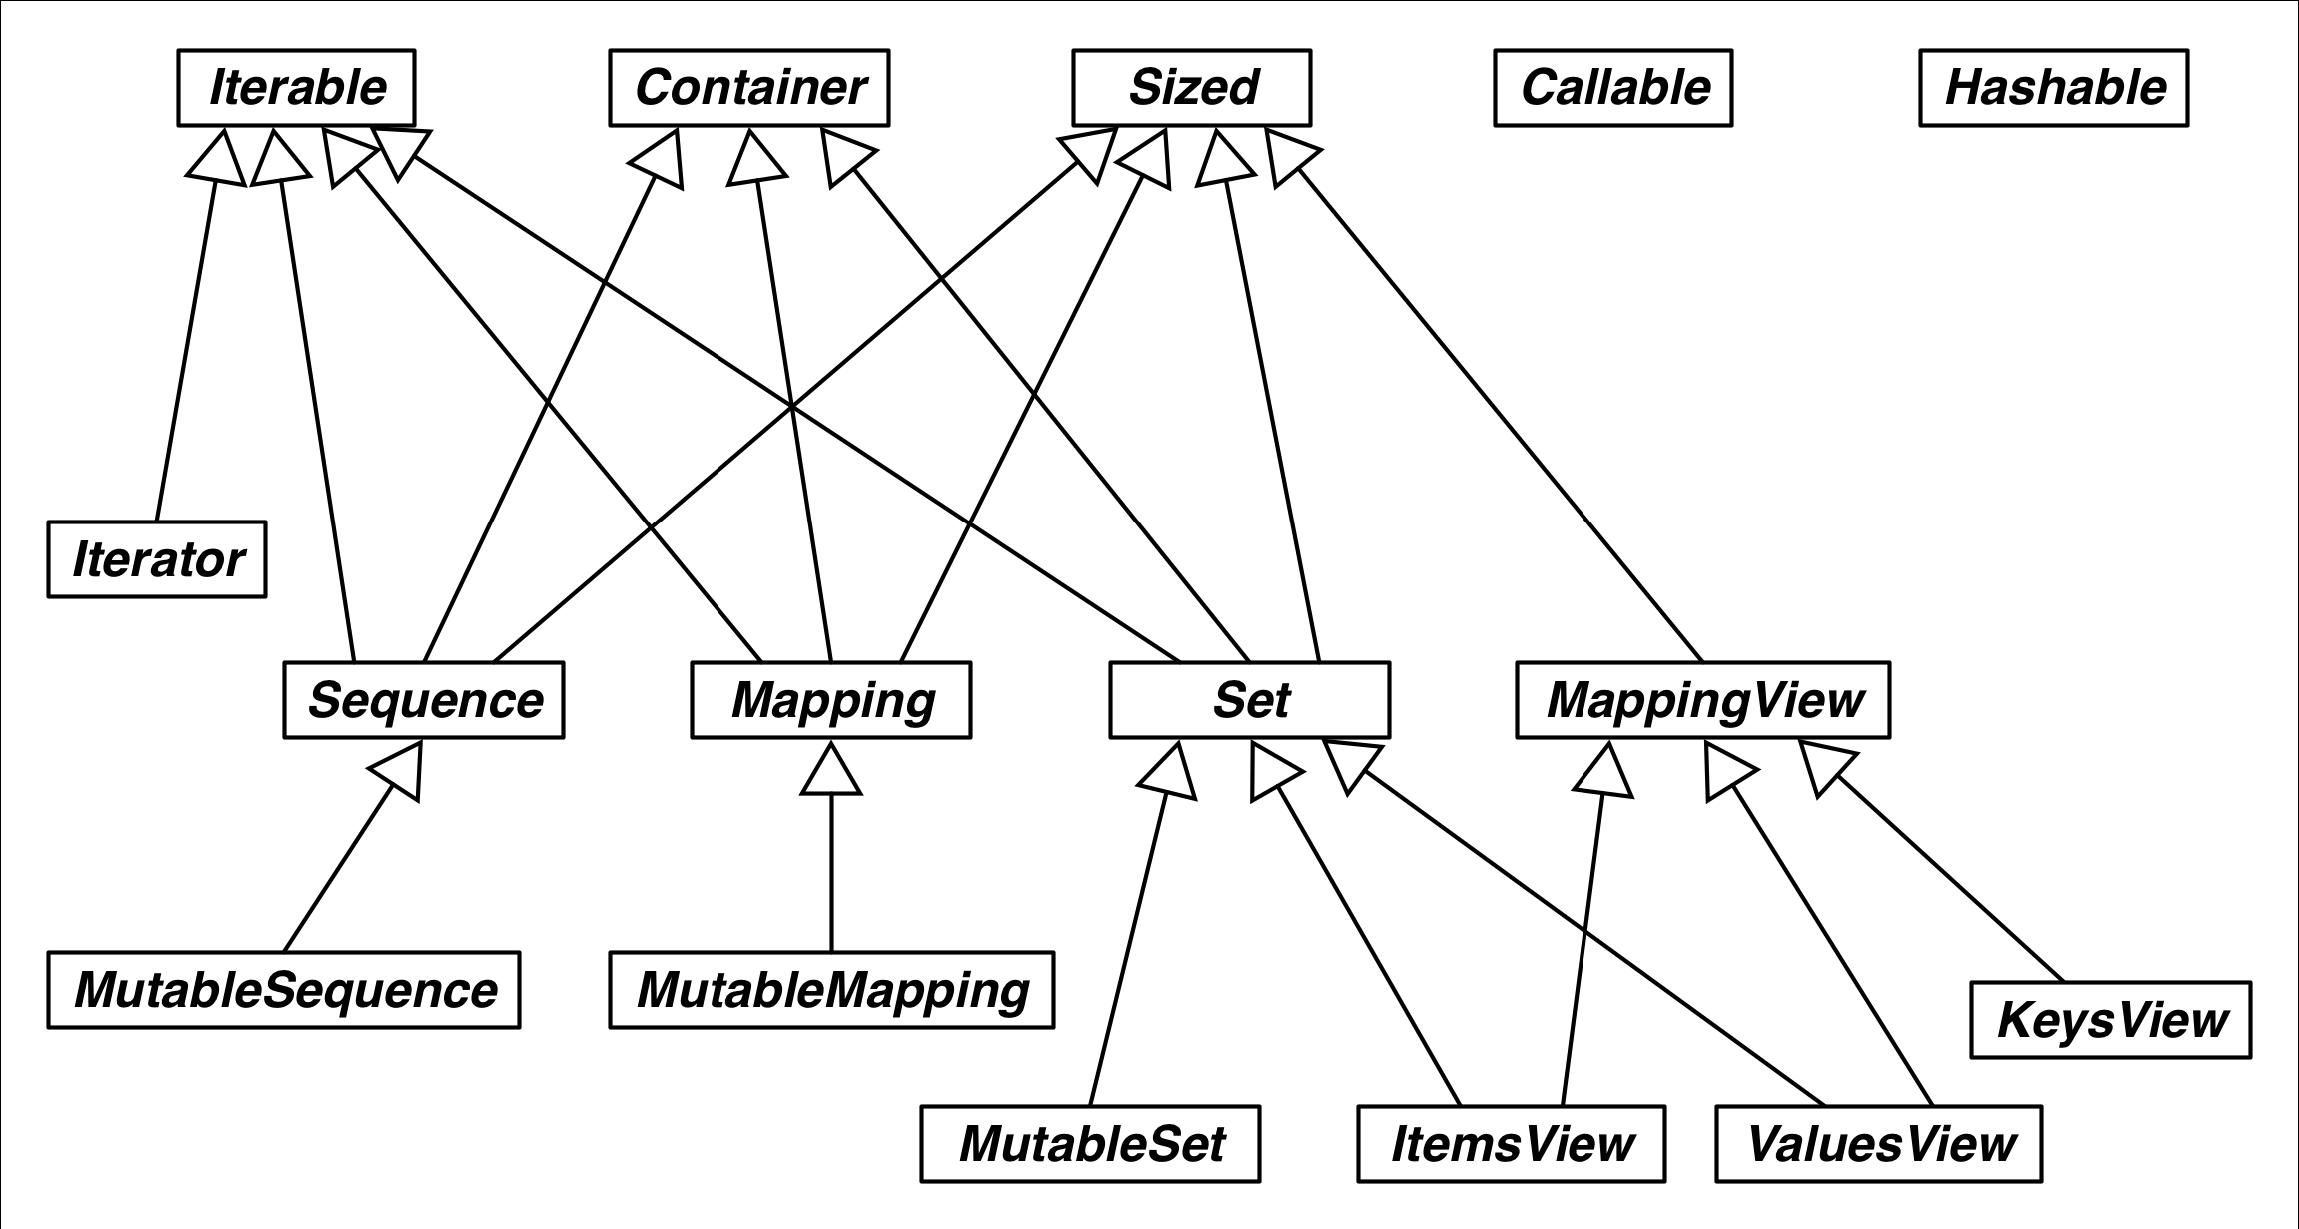
Iterable, Container and Sized
Every collection should either inherit from these ABCs or at least implement compatible
protocols. Iterable supports iteration with __iter__, Container supports
the in operator with __contains__ and Sized supports len() with __len__.
Sequence, Mapping and Set
These are the main immutable collection types, and each has a mutable subclass. A
detailed diagram for MutableSequence is in Figure 11-2; for MutableMapping and
MutableSet there are diagrams in Chapter 3 (Figure 3-1 and Figure 3-2).
MappingView
In Python 3, the objects returned from the mapping methods .items(), .keys()
and .values() inherit from ItemsView, ValuesView and ValuesView, respectively.
The first two also inherit the rich interface of Set, with all the operators we saw in
“Set operations” on page 82.
Callable and Hashable
These ABCs are not so closely related to collections, but collections.abc was the
first package to define ABCs in the standard library, and these two were deemed
important enough to be included. I’ve never seen subclasses of Callable or Hasha
ble. Their main use is to support the insinstance built-in as a safe way of determining
whether an object is callable or hashable7.
Iterator
Note that iterator subclasses Iterable. We discuss this further in Chapter 14.
### The numbers tower of ABCs
• Number
• Complex
• Real
• Rational
• Integral
## Defining and using an ABC


In [1]:
import abc
class Tombola(abc.ABC):
    @abc.abstractmethod
    def load(self, iterable):
        """Add items from an iterable."""
    @abc.abstractmethod
    def pick(self):
        """Remove item at random, returning it.
            This method should raise `LookupError` when the instance is empty.
        """
    def loaded(self):
        """Return `True` if there's at least 1 item, `False` otherwise."""
        return bool(self.inspect())
    def inspect(self):
        """Return a sorted tuple with the items currently inside."""
        items = []
        while True:
            try:
                items.append(self.pick())
            except LookupError:
                break
        self.load(items)
        return tuple(sorted(items))

In [3]:
class Fake(Tombola): # ➊
    def pick(self):
        return 13

In [4]:
Fake

__main__.Fake

In [5]:
f=Fake()

TypeError: Can't instantiate abstract class Fake with abstract methods load

### ABC syntax details
the preferred way to declare an abstract class method is:
class MyABC(abc.ABC):
    @classmethod
    @abc.abstractmethod
    def an_abstract_classmethod(cls, ...):
        pass
### Subclassing the Tombola ABC        

In [6]:
import random
class BingoCage(Tombola):
    def __init__(self, items):
        self._randomizer = random.SystemRandom()
        self._items = []
        self.load(items)
    def load(self, items):
        self._items.extend(items)
        self._randomizer.shuffle(self._items)
    def pick(self):
        try:
            return self._items.pop()
        except IndexError:
            raise LookupError('pick from empty BingoCage')
    def __call__(self):
        self.pick()

In [7]:
import random
class LotteryBlower(Tombola):
    def __init__(self, iterable):
        self._balls = list(iterable)
    def load(self, iterable):
        self._balls.extend(iterable)
    def pick(self):
        try:
            position = random.randrange(len(self._balls))
        except ValueError:
            raise LookupError('pick from empty BingoCage')
        return self._balls.pop(position)
    def loaded(self):
        return bool(self._balls)
    def inspect(self):
        return tuple(sorted(self._balls))

### A virtual subclass of Tombola
This is done by calling a register method on the ABC. The registered class then becomes
a virtual subclass of the ABC, and will be recognized as such by functions like
issubclass and isinstance, but it will not inherit any methods or attributes from the
ABC.
Virtual subclasses do not inherit from their registered ABCs, and
are not checked for conformance to the ABC interface at any
time, not even when they are instantiated. It’s up to the subclass
to actually implement all the methods needed to avoid runtime
errors.

In [8]:
from random import randrange
@Tombola.register #
class TomboList(list): #
    def pick(self):
        if self: #
            position = randrange(len(self))
            return self.pop(position) #
        else:
            raise LookupError('pop from empty TomboList')
    load = list.extend #
    def loaded(self):
        return bool(self) #
    def inspect(self):
        return tuple(sorted(self))

In [9]:
issubclass(TomboList, Tombola)

True

In [10]:
t = TomboList(range(100))
isinstance(t, Tombola)

True

In [11]:
TomboList.__mro__

(__main__.TomboList, list, object)

However, inheritance is guided by a special class attribute named __mro__ — the Method
Resolution Order. It basically lists the class and its superclasses in the order Python
uses to search for methods
## How the Tombola subclasses were tested
## Usage of register in practice

In [13]:
class Struggle:
    def __len__(self): return 23

In [14]:
from collections import abc
isinstance(Struggle(), abc.Sized)

True

In [15]:
issubclass(Struggle, abc.Sized)

True

# CHAPTER 12 Inheritance: for good or for worse
## Subclassing built-in types is tricky
Before Python 2.2 it was not possible to subclass built-in types such as list or dict.
Since then, it can be done but there is a major caveat: the code of the built-ins (written
in C) does not call special methods overridden by user-defined classes.
A good short description of the problem is in the documentation for PyPy, in Differences
between PyPy and CPython, section Subclasses of built-in types:
Officially, CPython has no rule at all for when exactly overridden method of subclasses
of built-in types get implicitly called or not. As an approximation, these methods are
never called by other built-in methods of the same object. For example, an overridden
__getitem__() in a subclass of dict will not be called by e.g. the built-in get()
method.

In [16]:
class DoppelDict(dict):
    def __setitem__(self, key, value):
        super().__setitem__(key, [value] * 2)  #   *用于重复list元素

In [19]:
dd = DoppelDict(one=1)
dd

{'one': 1}

In [20]:
dd['two']=2
dd

{'one': 1, 'two': [2, 2]}

In [22]:
dd.update(three=3)
dd

{'one': 1, 'three': 3, 'two': [2, 2]}

In [25]:
class AnswerDict(dict):
    def __getitem__(self, key): #
        return 42

In [27]:
ad = AnswerDict(a='foo')
ad['a']

42

In [29]:
d={}
d.update(ad)
d['a'],d

('foo', {'a': 'foo'})

Subclassing built-in types like dict or list or str directly is errorprone
because the built-in methods mostly ignore user-defined
overrides. Instead of subclassing the built-ins, derive your classes
from UserDict, UserList and UserString from the collections
module, which are designed to be easily extended.

In [30]:
import collections
class DoppelDict2(collections.UserDict):
    def __setitem__(self, key, value):
        super().__setitem__(key, [value] * 2)

In [31]:
dd=DoppelDict2(one=1)
dd

{'one': [1, 1]}

In [32]:
dd['two'] = 2
dd

{'one': [1, 1], 'two': [2, 2]}

In [33]:
dd.update(three=3)
dd

{'one': [1, 1], 'two': [2, 2], 'three': [3, 3]}

In [34]:
class AnswerDict2(collections.UserDict):
    def __getitem__(self, key):
        return 42

In [35]:
ad = AnswerDict2(a='foo')
ad['a']

42

In [36]:
d={}
d.update(ad)
d['a'],d

(42, {'a': 42})

To summarize: the problem described in this section applies only to method delegation
within the C language implementation of the built-in types, and only affects userdefined
classes derived directly from those types. If you subclass from a class coded in
Python, such as UserDict or MutableMapping, you will not be troubled by this.
## Multiple inheritance and method resolution order


In [45]:
class A:
    def ping(self):
        print('pingA:', self)
class B(A):
    def pong(self):
        print('pongB:', self)
class C(A):
    def pong(self):
        print('PONGC:', self)
class D(B, C):
    def ping(self):
        super().ping()
        print('post-pingD:', self)
    def pingpong(self):
        self.ping()
        super().ping()
        self.pong()
        super().pong()
        C.pong(self)

In [46]:
d = D()
d.pong()

pongB: <__main__.D object at 0x0000000005CC2710>


In [47]:
C.pong(d)  # You can always call a method on a superclass directly, passing the instance as an explicit argument.

PONGC: <__main__.D object at 0x0000000005CC2710>


The ambiguity of a call like d.pong() is resolved because Python follows a specific order
when traversing the inheritance graph. That order is called MRO: Method Resolution
Order. Classes have an attribute called __mro__ holding a tuple of references to the
superclasses in MRO order, from the current class all the way to the object class.

In [48]:
D.__mro__

(__main__.D, __main__.B, __main__.C, __main__.A, object)

The recommended way to delegate method calls to superclasses is the super() built-in
function,

In [49]:
d.ping()

pingA: <__main__.D object at 0x0000000005CC2710>
post-pingD: <__main__.D object at 0x0000000005CC2710>


In [50]:
d.pingpong()

pingA: <__main__.D object at 0x0000000005CC2710>
post-pingD: <__main__.D object at 0x0000000005CC2710>
pingA: <__main__.D object at 0x0000000005CC2710>
pongB: <__main__.D object at 0x0000000005CC2710>
pongB: <__main__.D object at 0x0000000005CC2710>
PONGC: <__main__.D object at 0x0000000005CC2710>


In [51]:
bool.__mro__

(bool, int, object)

## Multiple inheritance in the real world
An extreme example of multiple inheritance in the standard library is the Tkinter GUI
toolkit

In [52]:
def print_mro(cls):
    print(', '.join(c.__name__ for c in cls.__mro__))

In [54]:
import tkinter
print_mro(tkinter.Toplevel)

Toplevel, BaseWidget, Misc, Wm, object


In [55]:
print_mro(tkinter.Widget)

Widget, BaseWidget, Misc, Pack, Place, Grid, object


In [56]:
print_mro(tkinter.Button)

Button, Widget, BaseWidget, Misc, Pack, Place, Grid, object


In [57]:
print_mro(tkinter.Entry)

Entry, Widget, BaseWidget, Misc, Pack, Place, Grid, XView, object


In [58]:
print_mro(tkinter.Text)

Text, Widget, BaseWidget, Misc, Pack, Place, Grid, XView, YView, object


## Coping with multiple inheritance
Since we don’t have a comprehensive theory, here are a few
tips to avoid spaghetti class graphs.
1. Distinguish interface inheritance from implementation inheritance
When dealing with multiple inheritance it’s useful to keep straight the reasons why
subclassing is done in the first place. The main reasons are:
• Inheritance of interface: creates a sub-type, implying an “is-a” relationship.
• Inheritance of implementation: avoids code duplication by reuse.
In practice both uses are often simultaneous, but whenever you can make the intent
clear, do it. Inheritance for code reuse is an implementation detail, and it can often be
replaced by composition and delegation. On the other hand, interface inheritance is the
backbone of a framework.
2. Make interfaces explicit with ABCs
In modern Python, if a class is designed to define an interface, it should be an explicit
ABC. In Python ≥ 3.4 this means: subclass abc.ABC or another ABC
3. Use mixins for code reuse
If a class is designed to provide method implementations for reuse by multiple unrelated
subclasses, without implying an “is-a” relationship, it should be an explicit mixin class.
Conceptually, a mixin does not define a new type, it merely bundles methods for reuse.
A mixin should never be instantiated, and concrete classes should not inherit only from
a mixin. Each mixin should provide a single specific behavior, implementing few and
very closely related methods.
4. Make mixins explicit by naming
There is no formal way in Python to state that a class is a mixin, so it is highly recommended
that they are named with a …Mixin suffix. Tkinter does not follow this advice,
but if it did, XView, would be XViewMixin, Pack would be PackMixin and so on with all
the classes where I put the «mixin» tag
5. An ABC may also be a mixin; the reverse is not true
Since an ABC can implement concrete methods, it works as a mixin as well. An ABC
also defines a type, which a mixin does not. And an ABC can be the sole base class of
any another class, while a mixin should never be subclassed alone except by another,
more specialized mixin — not a common arrangement in real code.
One restriction applies to ABCs and not to mixins: the concrete methods implemented
in an ABC should only collaborate with methods of the same ABC and its superclasses.
This implies that concrete methods in an ABC are always for convenience, because
everything they do an user of the class can also do by calling other methods of the ABC.
6. Don’t subclass from more than one concrete class
Concrete classes should have zero or at most one concrete superclass6. In other words,
all but one of the superclasses of a concrete class should be ABCs or mixins. For example,
in the code below, if Alpha is a concrete class, then Beta and Gamma must be ABCs or
mixins:
class MyConcreteClass(Alpha, Beta, Gamma):
    """This is a concrete class: it can be instantiated."""
     ... more code ...
7. Provide aggregate classes to users
If some combination of ABCs or mixins is particularly useful to client code, provide a
class that brings them together in a sensible way. Grady Booch calls this an aggregate
class.
8. “Favor object composition over class inheritance.”

# CHAPTER 13 Operator overloading: doing it right

